In [ ]:
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!gdown https://github.com/rpeden/cat-or-not/releases/download/1.0/data.zip

Downloading...
From: https://github.com/rpeden/cat-or-not/releases/download/1.0/data.zip
To: /content/data.zip
100% 267M/267M [00:10<00:00, 26.3MB/s]


In [ ]:
import shutil

shutil.rmtree('./data', ignore_errors=True)

In [ ]:
!unzip data.zip -d .

串流輸出內容已截斷至最後 5000 行。
  inflating: ./data/training_set/cats/cat.1601.jpg  
  inflating: ./data/training_set/cats/cat.1602.jpg  
  inflating: ./data/training_set/cats/cat.1603.jpg  
  inflating: ./data/training_set/cats/cat.1604.jpg  
  inflating: ./data/training_set/cats/cat.1605.jpg  
  inflating: ./data/training_set/cats/cat.1606.jpg  
  inflating: ./data/training_set/cats/cat.1607.jpg  
  inflating: ./data/training_set/cats/cat.1608.jpg  
  inflating: ./data/training_set/cats/cat.1609.jpg  
  inflating: ./data/training_set/cats/cat.161.jpg  
  inflating: ./data/training_set/cats/cat.1610.jpg  
  inflating: ./data/training_set/cats/cat.1611.jpg  
  inflating: ./data/training_set/cats/cat.1612.jpg  
  inflating: ./data/training_set/cats/cat.1613.jpg  
  inflating: ./data/training_set/cats/cat.1614.jpg  
  inflating: ./data/training_set/cats/cat.1615.jpg  
  inflating: ./data/training_set/cats/cat.1616.jpg  
  inflating: ./data/training_set/cats/cat.1617.jpg  
  inflating: ./data/traini

In [ ]:
ls data/*

data/test_set:
cats/  notcats/

data/training_set:
cats/  notcats/


In [ ]:
ls data/training_set/cats -1 | wc -l

4000


In [ ]:
ls data/training_set/notcats -1 | wc -l

1668


In [ ]:
img_width, img_height = 224, 224
train_data_dir = './data/training_set'
#train_data_dir = os.path.join(os.getcwd(), 'test')
validation_data_dir = './data/test_set'
nb_train_samples = 1000
nb_validation_samples = 1000
epochs = 3
batch_size = 32
input_shape = (img_height, img_width, 3)
num_classes = 2 # 類別個數

In [ ]:
model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, None, None, 64)      │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, None, None, 64)      │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, None, None, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, None, None, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, None, None, 128)     │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, None, None, 128)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, None, None, 256)     │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, None, None, 256)     │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, None, None, 256)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, None, None, 512)     │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, None, None, 512)     │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, None, None, 512)     │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
#Create your own input format (here 224x224x3)
input = Input(shape=(img_width, img_height,3),name = 'image_input')

In [ ]:
#Use the generated model
output_vgg16_conv = model_vgg16_conv(input)

In [ ]:
#Add the fully-connected layers
x = Flatten(name='flatten')(output_vgg16_conv)
#x = Dense(4096, activation='relu', name='fc1')(x)
x = Dense(256, activation='relu', name='fc2')(x)
x = Dense(num_classes, activation='softmax', name='predictions')(x)
#x = Dense(2, activation='sigmoid')(x)

In [ ]:
#Create your own model
model = Model(inputs=input, outputs=x)

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.SGD(learning_rate=1e-4, momentum=0.9),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(
    # rescale=1. / 255,
    rotation_range = 0.2, # 旋轉
    shear_range=0.2, # 裁剪
    zoom_range=0.2,  # 放大/縮小
    horizontal_flip=False) # 水平翻轉

In [ ]:
SAVE_PATH="./data/train1"
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False, # 不放回抽樣
    # color_mode="grayscale", # no of channel = 1
    # save_to_dir=SAVE_PATH, # save to file
    class_mode='categorical')
train_dataset = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32)  # Set the correct output types
).repeat()

Found 5668 images belonging to 2 classes.


In [ ]:
validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    shuffle=False, # 不放回抽樣
    # color_mode="grayscale", # no of channel = 1
    #save_to_dir=SAVE_PATH,
    class_mode='categorical')
validation_dataset = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32)  # Set the correct output types
).repeat()

Found 2665 images belonging to 2 classes.


In [ ]:
train_generator.labels

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [ ]:
np.count_nonzero(train_generator.labels)

1668

In [ ]:
train_history = model.fit(
    train_generator,
    #steps_per_epoch=nb_train_samples // batch_size, # batch_size太小會造成資料增補樣本不足，太大會造成記憶體不足
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

Epoch 1/3


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 171s 733ms/step - accuracy: 0.6329 - loss: 2.1360 - val_accuracy: 0.9163 - val_loss: 0.3621
Epoch 2/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 145s 608ms/step - accuracy: 0.7509 - loss: 0.5610 - val_accuracy: 0.0786 - val_loss: 1.9623
Epoch 3/3
178/178 ━━━━━━━━━━━━━━━━━━━━ 142s 613ms/step - accuracy: 0.8275 - loss: 0.4433 - val_accuracy: 0.8062 - val_loss: 0.3562


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
img_path = './data/training_set/cats/cat.5.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x1 = image.img_to_array(img)
x1 = np.expand_dims(x1, axis=0)
x1 = preprocess_input(x1)

labels=['cat', 'dog']
predictions = model.predict(x1)
print('predict class:', labels[np.argmax(predictions)])
print('predict:', predictions.ravel())


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
predict class: cat
predict: [0.7395918 0.2604082]


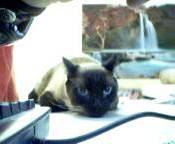

In [ ]:
from IPython.display import Image
Image(img_path)

In [ ]:
test_loss, test_acc = model.evaluate(validation_generator, verbose=2)
print("Test accuracy:", test_acc)

84/84 - 34s - 407ms/step - accuracy: 0.6732 - loss: 0.5676
Test accuracy: 0.6731707453727722
